In [1]:
# https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
import mne
sample_data_raw_file="./egi_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.load_data()

Opening raw data file ./egi_raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 256)  idle
    Range : 0 ... 999 =      0.000 ...     4.995 secs
Ready.
Reading 0 ... 999  =      0.000 ...     4.995 secs...


<Raw | egi_raw.fif, 256 x 1000 (5.0 s), ~2.3 MB, data loaded>

In [2]:
raw.plot()

Using qt as 2D backend.


Effective window size : 5.000 (s)


c:\Users\zhouz\mne-python\1.3.1_0\envs\mne\lib\site-packages\mne\viz\utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


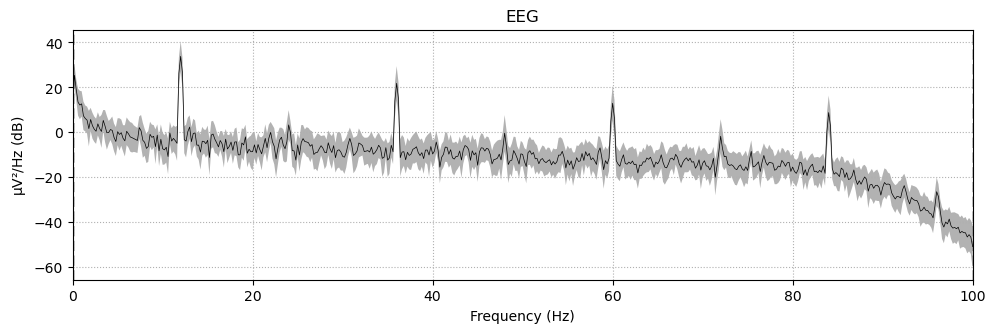

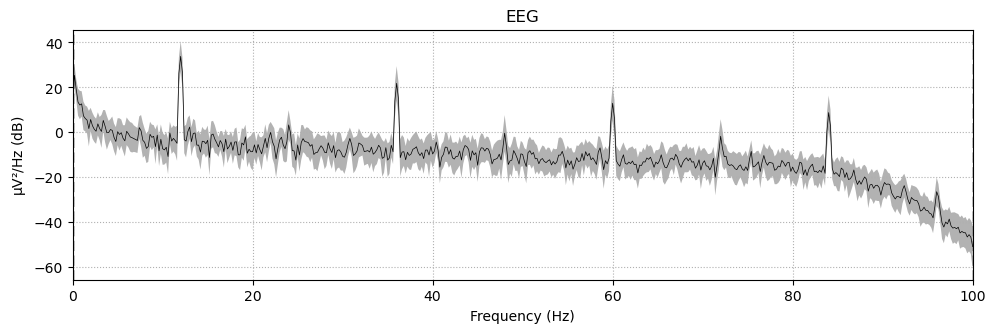

In [3]:
spectrum = raw.compute_psd()
spectrum.plot(average=True, picks="data", exclude="bads")

In [10]:
# import numpy as np
# events = np.column_stack(
#     (
#         np.arange(0, 200, 40),
#         np.zeros(5, dtype=int),
#         np.array([1, 2, 1, 2, 1]),
#     )
# )


array([[  0,   0,   1],
       [ 40,   0,   2],
       [ 80,   0,   1],
       [120,   0,   2],
       [160,   0,   1]])

In [21]:
import numpy as np
events=np.array([[  100,   0,   1],
       [ 300,   0,   2],
       [ 500,   0,   1],
       [700,   0,   2],
       [900,   0,   1]])
events

array([[100,   0,   1],
       [300,   0,   2],
       [500,   0,   1],
       [700,   0,   2],
       [900,   0,   1]])

In [6]:
event_dict = dict(condition_A=1, condition_B=2)

In [15]:
# import mne
# epochs = mne.Epochs(raw, events, tmin=-0.1, tmax=0.1, event_id=event_dict, preload=True)
# evoked = epochs["condition_A"].average()

Not setting metadata
5 matching events found
Setting baseline interval to [-0.1, 0.0] s
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
Using data from preloaded Raw for 5 events and 41 original time points ...
1 bad epochs dropped
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [1]:
# https://mne.tools/stable/generated/mne.Epochs.html
import mne
epochs = mne.Epochs(raw, events, tmin=-0.4, tmax=0.4, event_id=event_dict, preload=True)


NameError: name 'raw' is not defined

In [23]:
evoked = epochs["condition_A"].average()

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [24]:
mne.write_evokeds('evoked_A-ave.fif', evoked, on_mismatch='raise', overwrite=True, verbose=None)

Overwriting existing file.


In [26]:
# save cov
# # https://mne.tools/stable/auto_tutorials/raw/40_visualize_raw.html#sphx-glr-auto-tutorials-raw-40-visualize-raw-py
raw_empty_room=raw
raw_empty_room.info["bads"]


[]

In [27]:
raw_empty_room.add_proj([pp.copy() for pp in raw.info["projs"] if "EEG" not in pp["desc"]])

0 projection items deactivated


<Raw | egi_raw.fif, 256 x 1000 (5.0 s), ~2.3 MB, data loaded>

In [35]:
# https://mne.tools/stable/generated/mne.compute_raw_covariance.html
noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=0, tmax=0.4)

Using up to 2 segments
Number of samples used : 80
[done]


C:\Users\zhouz\AppData\Local\Temp\ipykernel_30072\3933585850.py:2: RuntimeWarning: Too few samples (required : 1285 got : 80), covariance estimate may be unreliable
  noise_cov = mne.compute_raw_covariance(raw_empty_room, tmin=0, tmax=0.4)


    Created an SSP operator (subspace dimension = 1)


Computing rank from covariance with rank=None
    Using tolerance 3.3e-10 (2.2e-16 eps * 256 dim * 5.9e+03  max singular value)
    Estimated rank (eeg): 156
    EEG: rank 156 computed from 256 data channels with 0 projectors


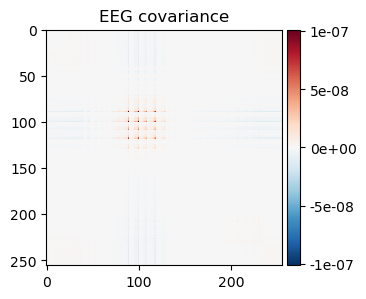

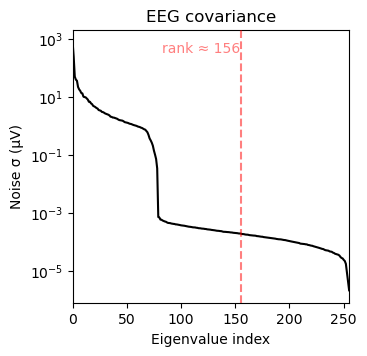

(<Figure size 380x370 with 2 Axes>, <Figure size 380x370 with 1 Axes>)

In [37]:
noise_cov.plot(raw_empty_room.info, proj=True)

In [38]:
mne.write_cov('egi-cov.fif', noise_cov, overwrite=True, verbose=None)

Overwriting existing file.


In [40]:
# noise_cov_baseline = mne.compute_covariance(epochs, tmin=-0.4,tmax=0)

Computing rank from data with rank=None
    Using tolerance 8.8e-10 (2.2e-16 eps * 256 dim * 1.5e+04  max singular value)
    Estimated rank (eeg): 255
    EEG: rank 255 computed from 256 data channels with 1 projector
    Created an SSP operator (subspace dimension = 1)
    Setting small EEG eigenvalues to zero (without PCA)


Reducing data rank from 256 -> 255
Estimating covariance using EMPIRICAL
Done.
Number of samples used : 405
[done]


C:\Users\zhouz\AppData\Local\Temp\ipykernel_30072\3193972094.py:1: RuntimeWarning: Too few samples (required : 1285 got : 405), covariance estimate may be unreliable
  noise_cov_baseline = mne.compute_covariance(epochs, tmin=-0.4,tmax=0)
